In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
print(keras.__version__)
print(tf.__version__)

2.4.0
2.4.1


In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


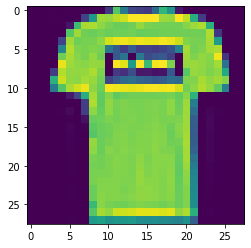

In [6]:
plt.imshow(x_train_full[1])

In [7]:
y_train_full[1] #tshirt = 0

0

In [9]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [11]:
class_names[y_train_full[1]]

'T-shirt/top'

In [12]:
#normalising the data
x_train_n=x_train_full/255.0
x_test_n=x_test/255.0

In [13]:
#splitting data into train/validate/test
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation="softmax"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
import pydot
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [23]:
weights,biases=model.layers[1].get_weights()  #initial random weights & biases assigned
print(weights)

[[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766046  0.03859074
  -0.06889391]
 [ 0.00476504 -0.03105379 -0.0586676  ...  0.00602964 -0.02763776
  -0.04165364]
 [-0.06189284 -0.06901957  0.07102345 ... -0.04238207  0.07121518
  -0.07331658]
 ...
 [-0.03048757  0.02155137 -0.05400612 ... -0.00113463  0.00228987
   0.05581069]
 [ 0.07061854 -0.06960931  0.07038955 ... -0.00384101  0.00034875
   0.02878492]
 [-0.06022581  0.01577859 -0.02585464 ... -0.00527829  0.00272203
  -0.06793761]]


In [24]:
weights.shape

(784, 300)

In [25]:
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [29]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0188 - accuracy: 0.6805 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4482 - accuracy: 0.8419 - val_loss: 0.5358 - val_accuracy: 0.7984
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4206 - accuracy: 0.8528 - val_loss: 0.3923 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4059 - accuracy: 0.8577 - val_loss: 0.3747 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3753 - accuracy: 0.8678 - val_loss: 0.3718 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3653 - accuracy: 0.8703 - val_loss: 0.3622 - val_accuracy:

In [30]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
model_history.history

{'loss': [0.7238965630531311,
  0.48415836691856384,
  0.43884649872779846,
  0.4121024012565613,
  0.3937506079673767,
  0.37496069073677063,
  0.3631379306316376,
  0.35168665647506714,
  0.3413308262825012,
  0.33200955390930176,
  0.3242212235927582,
  0.31494376063346863,
  0.3083149194717407,
  0.3021286427974701,
  0.29475638270378113,
  0.28938552737236023,
  0.2842341959476471,
  0.2779116928577423,
  0.2731196880340576,
  0.26764482259750366,
  0.26285478472709656,
  0.25786522030830383,
  0.25390610098838806,
  0.2488584816455841,
  0.2446095496416092,
  0.24081258475780487,
  0.236593097448349,
  0.23311452567577362,
  0.22870877385139465,
  0.22536979615688324],
 'accuracy': [0.7643091082572937,
  0.8320000171661377,
  0.8455454707145691,
  0.8565818071365356,
  0.8618181943893433,
  0.86765456199646,
  0.8709636330604553,
  0.8743454813957214,
  0.8792363405227661,
  0.8822908997535706,
  0.883618175983429,
  0.8862909078598022,
  0.8892363905906677,
  0.8914363384246826,

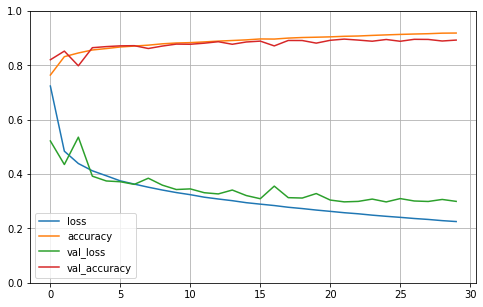

In [32]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8840


[0.33352765440940857, 0.8840000033378601]

In [34]:
x_new=x_test[:3]

In [36]:
y_prob=model.predict(x_new) #we have 10 types of items, we get each one's probability
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [38]:
y_pred=model.predict_classes(x_new)#tell the class label directly
y_pred

array([9, 2, 1])

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


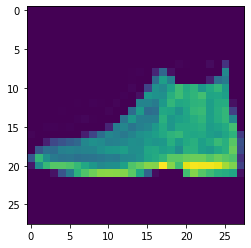

In [41]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


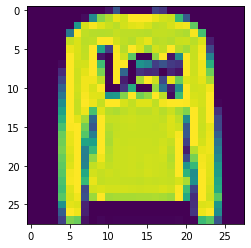

In [42]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


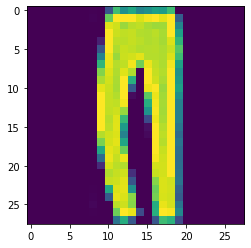

In [43]:
print(plt.imshow(x_test[2]))